## Polynomial regression


In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3  # random numbers from -3 to 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X[0]
# array([-0.75275929])

array([-0.75275929])

(-3.0, 3.0, 0.0, 10.0)

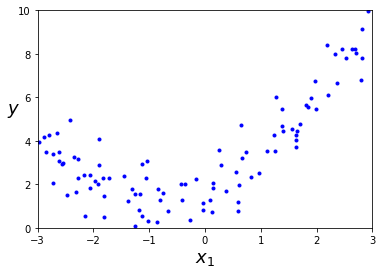

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

### Compare different degree of freedom

In [4]:
def plot_high_degrees(degree, X, y):
    for style, width, degree in (("g-", 1, degree[0]), ("b-", 2, degree[1]), ("r-", 2, degree[2])):
        polynomial_regression = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", LinearRegression()),
            ])
        polynomial_regression.fit(X, y)
        X_new=np.linspace(-3, 3, 100).reshape(100, 1)
        y_pred = polynomial_regression.predict(X_new)
        plt.plot(X_new, y_pred, style, label=f'polynomial regression with degree: {degree}', linewidth=width)

    plt.plot(X, y, "ko", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([-3, 3, 0, 10])

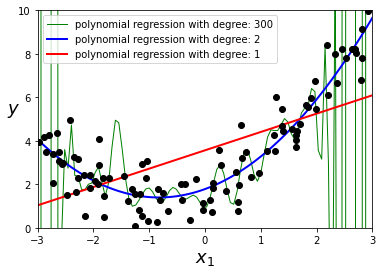

In [5]:
plot_high_degrees([300,2,1], X, y)

### Train and validation error vs training data set size

In [14]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    plt.axis([-1, 80, -1, 3])  

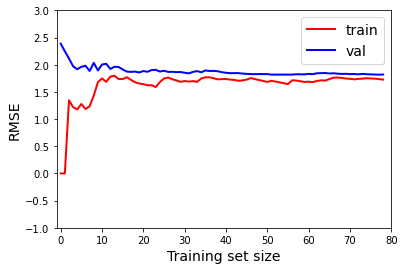

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

The linear model is underfiting the data

## Overfit

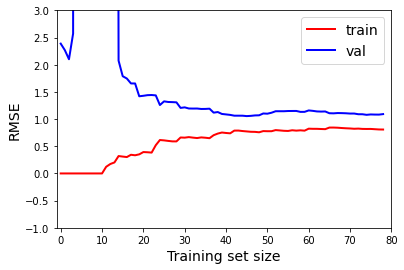

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

## degree=2

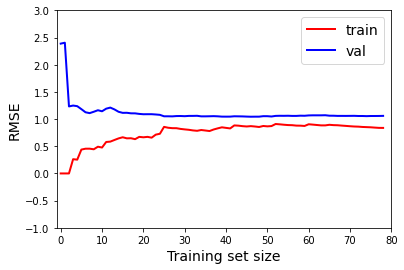

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)